# K-Nearest Neighbors
In this module, we will perform K-Nearest Neighbors on the load wine dataset and see how it performs when compared to those of other classifiers such as the perceptron model and logistic regression.

### Import Libraries
Let's start by importing our usual libraries and loading the load wine dataset.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#perform KKN on wine data set (binary in this case)
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# The artificial data will be taken from sklearn (load_wine)
from sklearn.datasets import load_wine

data, target = load_wine(return_X_y=True, as_frame=True)
data["target"] = target

### Plot the Data
Now let's plot the data for Flavanoids vs. Color Intensity, our usual two variables. However, notice that this time, we are including all three classes!

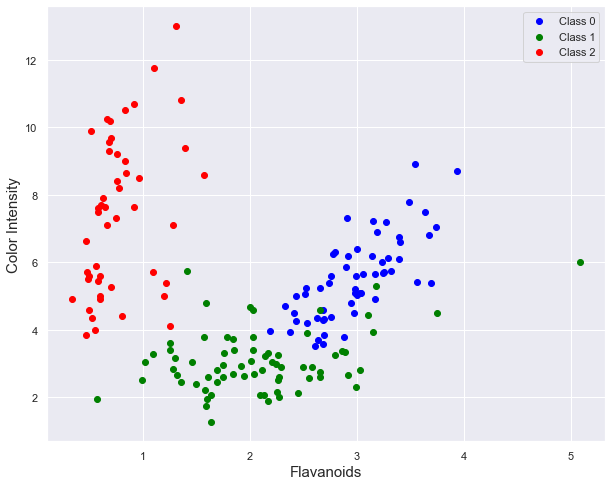

In [17]:
# Plot the data
classes = [0, 1, 2]
types = ["Class 0", "Class 1", "Class 2"]
colors = ["blue", "green", "red"]

fig, ax = plt.subplots(figsize = (10, 8))
for classes, types, color in zip(classes, types, colors):
    temp_df = data[data.target == classes] #data frame
    ax.scatter(temp_df.flavanoids,
               temp_df.color_intensity,
               c = color,
               label = types, 
               )
    
ax.set_xlabel("Flavanoids", fontsize = 15)
ax.set_ylabel("Color Intensity", fontsize = 15)
ax.legend()
plt.show()

### Splitting the Data
Let's split the data into training and testing data.

In [18]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split #easy way to split data

#turn into numpy array
X1 = data[["flavanoids",
          "color_intensity"]].to_numpy() 

y1 = target.to_numpy()

#random_state makes everything the same: same replicable data for randomness
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,
                                                    y1, 
                                                    test_size=0.33, 
                                                    random_state=42)

## Hard Code K-Nearest Neighbors
We will start by hard-coding K-Nearest Neighbors so that we understand how it works. Afterwards, we will use Skicit-Learn's K-Nearest Neighbor classifier as it is easier to implement. However, it is important that we understand how each of our programs works so that we are not just throwing things into a black box.

### Instantiate Distance Function
We start by instantiating the distance function. Why do we do this? Well, K-Nearest Neighbors is actually a simple function that calculates the distance between points and clusters the data into groups that are closest together. Thus, in order to cluster our data, we have to first be able to find the distance between points.

In [19]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

### Defining K-Nearest Neighbors
We are now ready to define our K-Nearest Neighbor function. What we do first is find the distance between all the various points. Then we list the points closest to another giving point (our testing data).

In [61]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count) #counts the labels
    
    else:
        return sum(x[1] for x in neighbors)/k

### Test the K-Nearest Neighbors function
Let's see what happens when we input a random testing point. As we can see, the top five closest points to this point are Class 1, so we can relatively confidently say that the unknown point is also Class 1.

In [62]:
k_nearest_neighbors(X1_test[-1], X1_train, y1_train, 5)

[[array([2.17, 1.9 ]), 1, 0.2624880949681338],
 [array([2.26, 2.5 ]), 1, 0.350142828000232],
 [array([2.27, 2.6 ]), 1, 0.4504442251822085],
 [array([2.55, 2.57]), 1, 0.5161395160225575],
 [array([2.65, 2.6 ]), 1, 0.6020797289396148]]

### Confirm Findings
We can also confirm our findings by seeing if our results match the y-testing data. We can see that our results indeed match and the point we guessed to be of Class 1 is Class 1.

In [59]:
y1_test[-1]

1

### Define Classification Error
We can also write a function to calculate classification error and see if how correct our classifications are. The error classification function is relatively intuitive. It simple compares predictions to testing data and sees how many match.

In [74]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                        training_features, 
                                        training_labels, 
                                        k)
    return error/len(test_features)

### Test Classification Error
Now let's see how accurate our classification is. The error is only 10%, which is pretty good!

In [75]:
classification_error(X1_test, y1_test, X1_train, y1_train, 6)

0.1016949152542373

### Calculate Accuracy
Likewise, we can also calculate the accuracy of our K-Nearest Neighbors classifier, which is just seeing what percentage of points we classified correctly.

In [76]:
def classification_accuracy(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    accuracy = 0
    for point, label in zip(test_features, test_labels):
        accuracy += label == KNN_Predict(point, 
                                        training_features, 
                                        training_labels, 
                                        k)
    return accuracy/len(test_features)

### Test Accuracy
As we can see, accuracy is pretty high.

In [77]:
classification_accuracy(X1_test, y1_test, X1_train, y1_train, 6)

0.8983050847457628

## Coding in Scikit-Learn
We now try coding K-Nearest Neighbors in Scikit-Learn, which as we will soon discover, is much simpler.

### Instantiate K-Nearest Neighbors Classifier
We first instantiate the K-Nearest Neighbors Classifier. As we can see, this is much easier than writing a lot definitions when we hard code K-Nearest Neighbors.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=6)

### Fit the Data
Now let's fit the data for Flavanoids vs. Color Intensity

In [68]:
#fit data
clf.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=6)

### Test Accuracy
We can now test the accuracy of our model, which Scikit-Learn defines as "score". We can see that the accuracy score is the same as the accuracy score we got earlier, which means that Scikit-Learn's K-Nearest Neighbors Algorithm is indeed calculating the same thing as us.

In [78]:
# Calculate the accuracy
clf.score(X1_test, y1_test)

#Matches above

0.8983050847457628

### Plot Decision Boundaries 
We can also plot the decision boundaries for our dataset. As we can see, the decision boundaries look pretty accurate. Another interesting thing to note is that the decision boundaries are no longer linear.


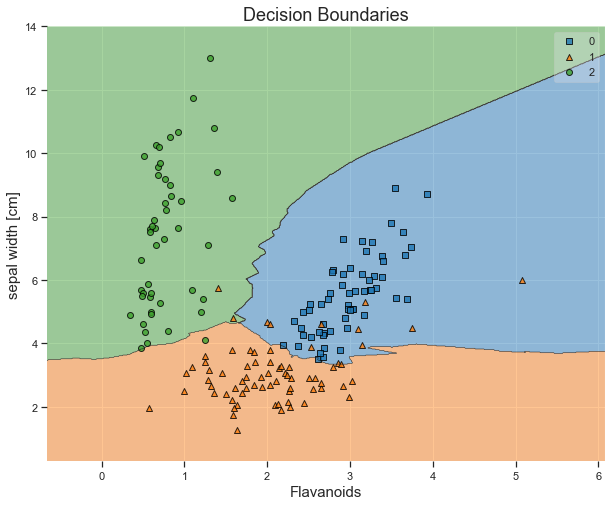

In [79]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X1, y1, clf = clf)
plt.xlabel("Flavanoids", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

## K-Nearest Neighbors on less separable data
As we have discovered previously, when we try to classify the various classes of wine using Magnesium vs. Non-Flavanoid Phenols, the models (Perceptron and Logistic Regression) go a little haywire and we haven't yet found an accurate model. Thus, let's see what happens when we implement K-Nearest Neighbors and if it performs any better.

### Plot Data
Let's start by plotting our data. Note that this time we are also trying to classify all three classes of wine as opposed to only two classes. The data is pretty overlapped and doesn't look easy to classify!

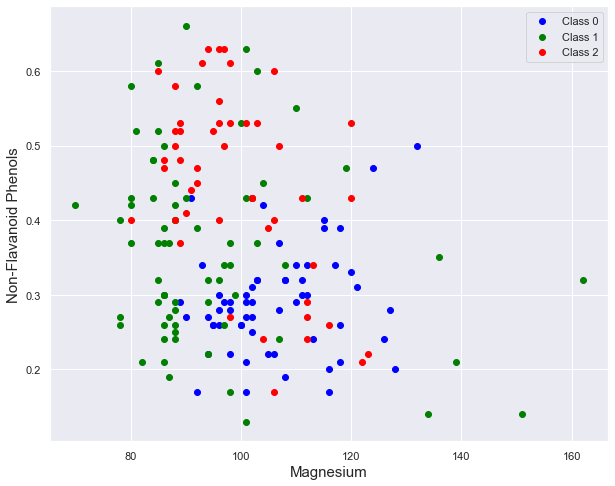

In [83]:
# Plot the data
classes = [0, 1, 2]
types = ["Class 0", "Class 1", "Class 2"]
colors = ["blue", "green", "red"]

fig, ax = plt.subplots(figsize = (10, 8))
for classes, types, color in zip(classes, types, colors):
    temp_df = data[data.target == classes] #data frame
    ax.scatter(temp_df.magnesium,
               temp_df.nonflavanoid_phenols,
               c = color,
               label = types, 
               )
    
ax.set_xlabel("Magnesium", fontsize = 15)
ax.set_ylabel("Non-Flavanoid Phenols", fontsize = 15)
ax.legend()
plt.show()

### Split Data
Now let's split our data into training and testing data.

In [84]:
#Turn into numpy array
X2 = data[["magnesium",
          "nonflavanoid_phenols"]].to_numpy() 

y2 = target.to_numpy()

#random_state makes everything the same: same replicable data for randomness
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2, 
                                                    test_size=0.33, 
                                                    random_state=42)

### Fit data
Now we train the data.

In [85]:
#fit data
clf.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=6)

### Test Accuracy
Finally, we calculate the accuracy. 63%! This seems better than any other model we've seen so far.

In [87]:
# Calculate the accuracy
clf.score(X2_test, y2_test)

#Matches above

0.6271186440677966

### Plot Decision Regions
Now let's plot the decision regions. Wow! Although the data may not be classified completely correctly, it no longer looks like random guessing. In the past, all of models just guess one class for all the points, but there actually seems to be a pattern here!

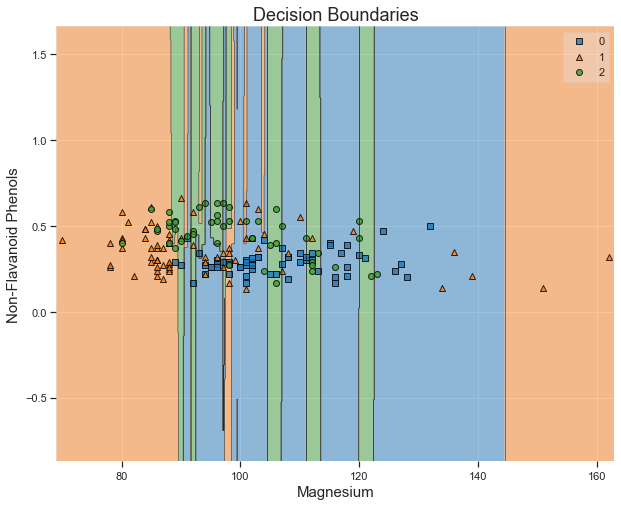

In [89]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X2, y2, clf = clf)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

### Plot Confusion Matrix
We can further analyze our accuracy by plotting the confusion matrix. As we can see, the accuracy is pretty good! Most of the points are classified correctly.

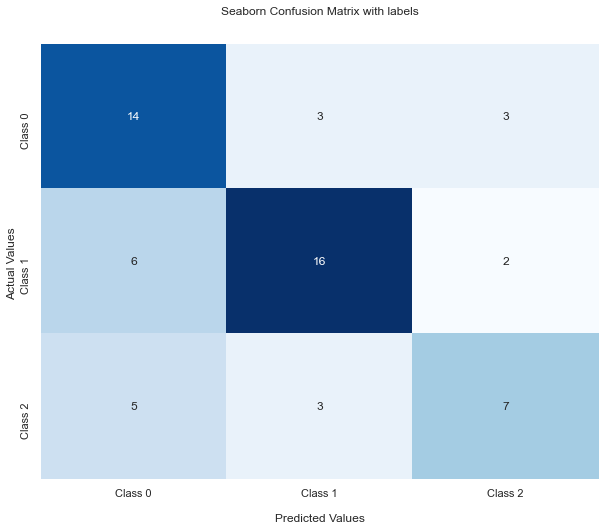

In [94]:
from sklearn.metrics import confusion_matrix

y2_pred = clf.predict(X2_test) #Get the confusion matrix
cf_matrix = confusion_matrix(y2_test, y2_pred)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) #no color bar: cbar

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Class 0','Class 1', 'Class 2'])
ax.yaxis.set_ticklabels(['Class 0','Class 1', 'Class 2'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Display Classification Report
Let's also look at our classification report to see how we did. Wow! The f1-score of Class 1 is 0.7! Although the precision and recall are still not super high, considering how hard the data is to classify, I would say that K-Nearest Neighbors did an extremely good job at classifying the data.

In [95]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.56      0.70      0.62        20
           1       0.73      0.67      0.70        24
           2       0.58      0.47      0.52        15

    accuracy                           0.63        59
   macro avg       0.62      0.61      0.61        59
weighted avg       0.63      0.63      0.63        59



## Takeaways
As we can see from this module, although K-Nearest Neighbors is a very simple algorithm to implement and understand, it is also extremely powerful. It is able to classify different classes of wine using attributes that none of our algorithms previously could use to classify. 